In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
# Load the ferry trips data
ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')

# Display the first few rows to understand the structure
ferry_data.head()
# Summary of the dataset
#ferry_data.info()

,route_id,route_name,ferry_name,ferry_id,terminal_departure,terminal_arrival,time_departure,cars_outbound,trucks_outbound,trucks_with_trailer_outbound,...,passenger_car_equivalent_outbound,passenger_car_equivalent_inbound,fuelcons_outbound_l,distance_outbound_nm,start_time_outbound,end_time_outbound,fuelcons_inbound_l,distance_inbound_nm,start_time_inbound,end_time_inbound
0,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 05:44:00,6,0,0,...,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 06:04:00,4,0,0,...,4.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 06:24:00,8,1,0,...,10.5,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 06:44:00,5,1,0,...,7.5,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,Oxdjupsleden,Fragancia,289,Rindö ...,Värmdö ...,2023-03-01 07:04:00,7,0,0,...,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Q1 What is the total fuel cost for ferry Jupiter in January 2024 assuming that the price per liter is 20 sek?

In [434]:
# Convert 'time_departure' to datetime objects for filtering
ferry_data['time_departure'] = pd.to_datetime(ferry_data['time_departure'])

# Filter data for ferry 'Jupiter' and January 2024
jupiter_jan_data = ferry_data[
    (ferry_data['ferry_name'] == 'Jupiter') &
    (ferry_data['time_departure'].dt.month == 1) &
    (ferry_data['time_departure'].dt.year == 2024)
]

# Calculate total fuel consumption (handling potential NaNs by filling with 0)
total_fuel_consumption = (
    jupiter_jan_data['fuelcons_outbound_l'].fillna(0).sum() +
    jupiter_jan_data['fuelcons_inbound_l'].fillna(0).sum()
)

# Assuming a fuel cost per liter (you might need to adjust this)
# Let's assume a fuel cost of 10 SEK per liter for example purposes
fuel_cost_per_liter = 20

# Calculate the total fuel cost
total_fuel_cost = total_fuel_consumption * fuel_cost_per_liter

print(f"Total fuel consumption for ferry Jupiter in January 2024: {total_fuel_consumption:.2f} liters")
print(f"Total fuel cost for ferry Jupiter in January 2024: {total_fuel_cost:.2f} SEK")

Total fuel consumption for ferry Jupiter in January 2024: 12709.34 liters
Total fuel cost for ferry Jupiter in January 2024: 254186.70 SEK


## Q2 What is the average speed of ferry Jupiter? (in km/h)


In [435]:
# Convert time columns to datetime objects
ferry_data['start_time_outbound'] = pd.to_datetime(ferry_data['start_time_outbound'])
ferry_data['end_time_outbound'] = pd.to_datetime(ferry_data['end_time_outbound'])
ferry_data['start_time_inbound'] = pd.to_datetime(ferry_data['start_time_inbound'])
ferry_data['end_time_inbound'] = pd.to_datetime(ferry_data['end_time_inbound'])

# Filter data for ferry 'Jupiter'
jupiter_data = ferry_data[ferry_data['ferry_name'] == 'Jupiter'].copy()

# Function to calculate trip duration in hours, handling potential NaNs
def calculate_duration(start_time, end_time):
    if pd.notna(start_time) and pd.notna(end_time):
        duration = (end_time - start_time).total_seconds() / 3600
        return duration
    return None

# Apply the function to calculate outbound and inbound durations
jupiter_data['duration_outbound'] = jupiter_data.apply(
    lambda row: calculate_duration(row['start_time_outbound'], row['end_time_outbound']), axis=1
)
jupiter_data['duration_inbound'] = jupiter_data.apply(
    lambda row: calculate_duration(row['start_time_inbound'], row['end_time_inbound']), axis=1
)

# Calculate average speed for outbound trips (distance in nautical miles, duration in hours)
jupiter_data['speed_outbound_knots'] = jupiter_data.apply(
    lambda row: row['distance_outbound_nm'] / row['duration_outbound']
    if row['duration_outbound'] else None,
    axis=1
)

# Calculate average speed for inbound trips
jupiter_data['speed_inbound_knots'] = jupiter_data.apply(
    lambda row: row['distance_inbound_nm'] / row['duration_inbound']
    if row['duration_inbound'] else None,
    axis=1
)

# Calculate the average of all valid speed values
valid_speeds = pd.concat([jupiter_data['speed_outbound_knots'].dropna(), jupiter_data['speed_inbound_knots'].dropna()])

if not valid_speeds.empty:
    average_speed_knots = valid_speeds.mean()
    print(f"The average speed of ferry Jupiter is: {average_speed_knots:.2f} knots")

    # Convert knots to km/h and mph for better understanding
    average_speed_kmh = average_speed_knots * 1.852
    average_speed_mph = average_speed_knots * 1.15078
    print(f"Average speed in km/h: {average_speed_kmh:.2f} km/h")
    print(f"Average speed in mph: {average_speed_mph:.2f} mph")
else:
    print("Could not calculate the average speed for ferry Jupiter due to missing distance or time information.")

The average speed of ferry Jupiter is: 6.23 knots
Average speed in km/h: 11.55 km/h
Average speed in mph: 7.17 mph


## Q3 How many vehicles are on average left at the terminal for inbound trips? 

In [436]:
# Total vehicles left at the terminal
vehicles_left_total = ferry_data['vehicles_left_at_terminal_outbound'].sum() + ferry_data['vehicles_left_at_terminal_inbound'].sum()

# Average vehicles left at terminal per trip
vehicles_left_avg = ferry_data[['vehicles_left_at_terminal_outbound', 'vehicles_left_at_terminal_inbound']].mean()

print(f"Total vehicles left: {vehicles_left_total}")
print(vehicles_left_avg)

Total vehicles left: 44748
vehicles_left_at_terminal_outbound    0.318175
vehicles_left_at_terminal_inbound     0.326999
dtype: float64


## Q3 How many vehicles on average are left at the terminal per trip for ferry Jupiter during June, July and August?

In [437]:
# Convert 'time_departure' to datetime objects for filtering
ferry_data['time_departure'] = pd.to_datetime(ferry_data['time_departure'], errors='coerce')

# Filter data for ferry 'Jupiter'
jupiter_data = ferry_data[ferry_data['ferry_name'] == 'Jupiter'].copy()

# Define summer months (June, July, August)
summer_months = [6, 7, 8]

# Filter Jupiter data for summer months, handling potential NaT values
jupiter_summer_data = jupiter_data[
    jupiter_data['time_departure'].notna() &
    jupiter_data['time_departure'].dt.month.isin(summer_months)
]

# Calculate the total vehicles left at the terminal during summer for Jupiter
# Assuming the columns for vehicles left are:
vehicles_left_cols = ['cars_outbound', 'trucks_outbound', 'trucks_with_trailer_outbound',
                      'cars_inbound', 'trucks_inbound', 'trucks_with_trailer_inbound']

total_left_summer_jupiter = jupiter_summer_data[vehicles_left_cols].fillna(0).sum().sum()

# Calculate the total number of trips made by Jupiter during the summer
total_trips_summer_jupiter = len(jupiter_summer_data)

# Calculate the average amount of vehicles left per trip for Jupiter during summer
average_left_summer_jupiter = total_left_summer_jupiter / total_trips_summer_jupiter if total_trips_summer_jupiter > 0 else 0

print(f"Total vehicles left at the terminal for ferry Jupiter during June, July and August: {total_left_summer_jupiter}")
print(f"The verage amount of vehicles left at the terminal per trip for ferry Jupiter during these months: {average_left_summer_jupiter:.2f}")


Total vehicles left at the terminal for ferry Jupiter during June, July and August: 199263
The verage amount of vehicles left at the terminal per trip for ferry Jupiter during these months: 43.21


## Q4 Which route has the highest average distance travelled, considering both outbound and inbound directions?

Correct answer
The route with the highest average distance travelled is: Aspöleden with an average distance of 3.22 NM.
Relevant context
       route_name ferry_name             direction  average_distance_nm_leg
0       Aspöleden      Yxlan  distance_outbound_nm                 3.212223
1  Furusundsleden  Merkurius  distance_outbound_nm                 0.235259
2   Ljusteröleden    Jupiter  distance_outbound_nm                 0.569472
3    Oxdjupsleden  Fragancia  distance_outbound_nm                 0.250244
4   Vaxholmsleden       Nina  distance_outbound_nm                 0.488404
5       Aspöleden      Yxlan   distance_inbound_nm                 3.230830
6  Furusundsleden  Merkurius   distance_inbound_nm                 0.234637
7   Ljusteröleden    Jupiter   distance_inbound_nm                 0.567139
8    Oxdjupsleden  Fragancia   distance_inbound_nm                 0.247365
9   Vaxholmsleden       Nina   distance_inbound_nm                 0.487763


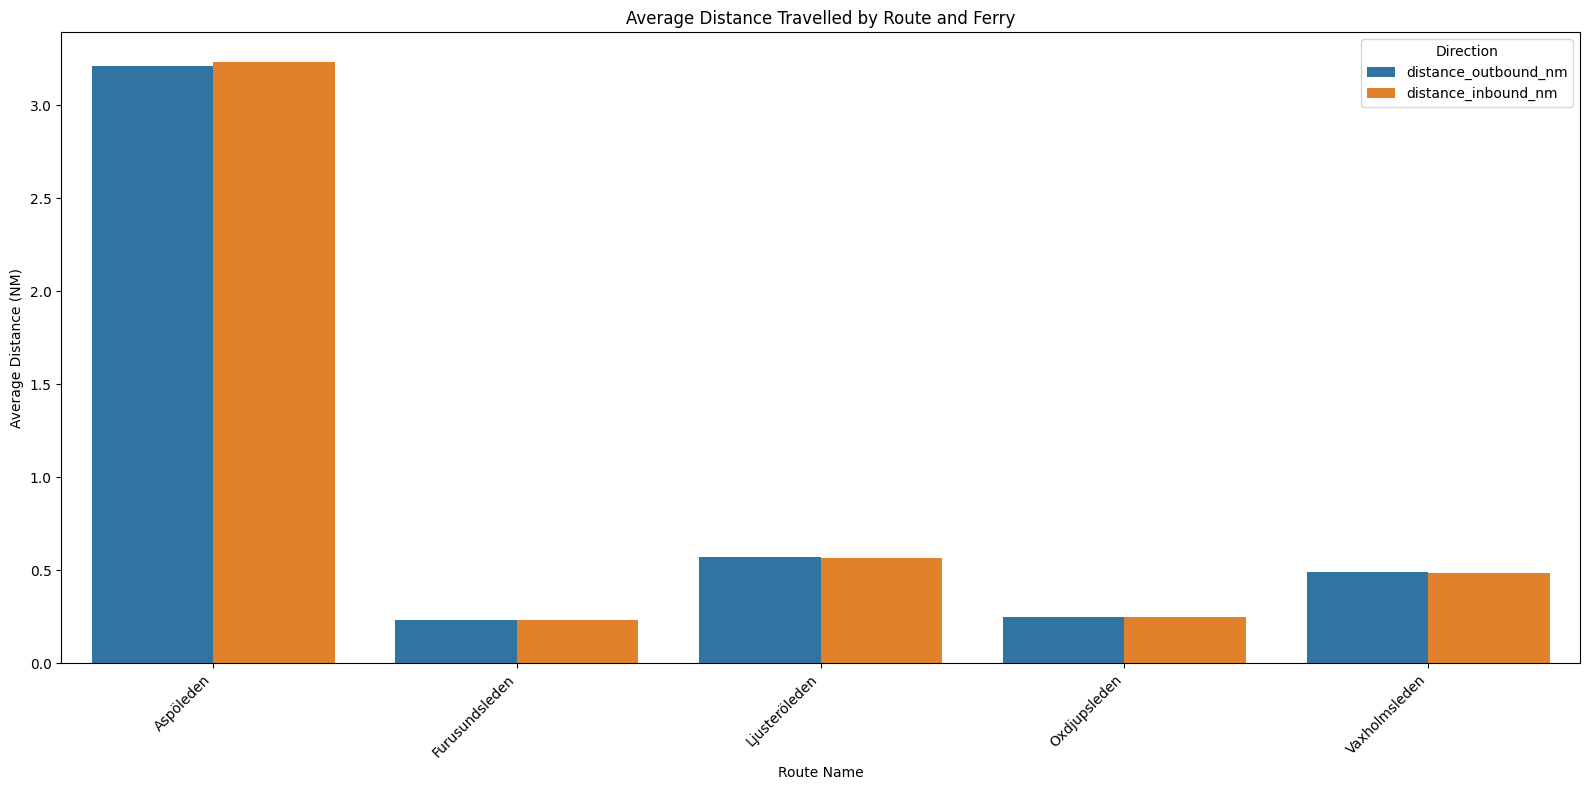

In [438]:
def distance_travelled_analysis(df):
    distance_data = df[['route_name', 'ferry_name', 'distance_outbound_nm', 'distance_inbound_nm']].copy() # Added .copy() to avoid SettingWithCopyWarning

    # Drop null values
    distance_data = distance_data.dropna()

    # Calculate the average distance for each leg (outbound and inbound)
    distance_by_route_ferry = distance_data.groupby(['route_name', 'ferry_name'])[['distance_outbound_nm', 'distance_inbound_nm']].mean().reset_index()

    # Calculate the overall average distance for each route and ferry
    distance_by_route_ferry['average_distance_nm'] = (distance_by_route_ferry['distance_outbound_nm'] + distance_by_route_ferry['distance_inbound_nm']) / 2

    # Group by route_name and calculate the mean of the overall average distance
    average_distance_by_route = distance_by_route_ferry.groupby('route_name')['average_distance_nm'].mean().reset_index()

    # Find the route with the highest average distance
    route_with_highest_distance = average_distance_by_route.loc[average_distance_by_route['average_distance_nm'].idxmax()]

    print(f"The route with the highest average distance travelled is: {route_with_highest_distance['route_name']} with an average distance of {route_with_highest_distance['average_distance_nm']:.2f} NM.")

    distance_by_route_ferry_melted = distance_by_route_ferry.melt(
        id_vars=['route_name', 'ferry_name'],
        value_vars=['distance_outbound_nm', 'distance_inbound_nm'],
        var_name='direction',
        value_name='average_distance_nm_leg' # Renamed to avoid confusion
    )
    print("Relevant context")
    print(distance_by_route_ferry_melted.head(10))
    plt.figure(figsize=(16, 8))
    sns.barplot(
        data=distance_by_route_ferry_melted,
        x='route_name',
        y='average_distance_nm_leg',
        hue='direction'
    )
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Distance Travelled by Route and Ferry')
    plt.xlabel('Route Name')
    plt.ylabel('Average Distance (NM)')
    plt.legend(title='Direction')
    plt.tight_layout()
    plt.show()

# Call the function
print("Correct answer")
distance_travelled_analysis(ferry_data)

## Q5 What is the average distance travelled on Ljusteröleden?

In [439]:
def average_distance_on_ljusteroleden(df):
    ljusteroleden_data = df[df['route_name'] == 'Ljusteröleden'].copy()

    if not ljusteroleden_data.empty:
        # Calculate the average distance for each trip on Ljusteröleden
        ljusteroleden_data['average_trip_distance_nm'] = (
            ljusteroleden_data['distance_outbound_nm'] + ljusteroleden_data['distance_inbound_nm']
        ) / 2

        # Calculate the overall average distance for Ljusteröleden
        average_distance = ljusteroleden_data['average_trip_distance_nm'].mean()

        print(f"The average distance travelled on Ljusteröleden is: {average_distance:.2f} NM.")
    else:
        print("Data for Ljusteröleden not found in the provided DataFrame.")


In [440]:
average_distance_on_ljusteroleden(ferry_data)

The average distance travelled on Ljusteröleden is: 0.57 NM.


## Q6 What is the PCE for the peak hour for route Aspöleden in February?

In [441]:
# Q6 What is the peak hour for route Aspöleden in February?

def peak_hour_aspo_february(df):
    # Make a copy of the dataframe
    df = df.copy()
    
    # Convert time_departure to datetime and filter for February
    df['time_departure'] = pd.to_datetime(df['time_departure'], errors='coerce')
    # Create an explicit copy when filtering to avoid SettingWithCopyWarning
    february_data = df[df['time_departure'].dt.month == 2].copy()
    
    # Extract hour and filter for Aspöleden
    february_data['hour'] = february_data['time_departure'].dt.hour
    aspo_february = february_data[february_data['route_name'] == 'Aspöleden'].copy()
    
    # Aggregate by hour
    hourly_demand = aspo_february.groupby('hour').agg({
        'passenger_car_equivalent_outbound': 'sum',
        'passenger_car_equivalent_inbound': 'sum'
    }).reset_index()
    
    # Find peak hour (for both directions)
    outbound_peak = hourly_demand.loc[hourly_demand['passenger_car_equivalent_outbound'].idxmax()]
    inbound_peak = hourly_demand.loc[hourly_demand['passenger_car_equivalent_inbound'].idxmax()]
    
    hourly_demand['total_pce'] = hourly_demand['passenger_car_equivalent_outbound'] + hourly_demand['passenger_car_equivalent_inbound']
    overall_peak = hourly_demand.loc[hourly_demand['total_pce'].idxmax()]
    
    print(f"Peak hour analysis for Aspöleden in February:")
    print(f"Outbound peak: Hour {outbound_peak['hour']}:00 with {outbound_peak['passenger_car_equivalent_outbound']:.2f} PCE")
    print(f"Inbound peak: Hour {inbound_peak['hour']}:00 with {inbound_peak['passenger_car_equivalent_inbound']:.2f} PCE")
    print(f"The average PCE for the peak hour is: {overall_peak['total_pce']:.2f}")
    
    # Determine overall peak (combining both directions)
   
    
    print(f"\nThe peak hour has a total PCE of {overall_peak['total_pce']:.2f}")
    
    return overall_peak['hour']

# Find the peak hour for Aspöleden in February
peak_hour = peak_hour_aspo_february(ferry_data)

Peak hour analysis for Aspöleden in February:
Outbound peak: Hour 12.0:00 with 701.00 PCE
Inbound peak: Hour 12.0:00 with 791.00 PCE
The average PCE for the peak hour is: 1492.00

The peak hour has a total PCE of 1492.00


## Q7 What is the average fuel consumption on the route Ljusterö to Östanå, combining both outbound and inbound?

In [442]:
# Q7 What is the average fuel consumption on the route Ljusterö to Östanå, combining both outbound and inbound?

def fuel_consumption_ljustero_ostana(df):
    """Calculate average fuel consumption for the route between Ljusterö and Östanå."""
    # Filter for Ljusteröleden route
    ljusteroleden_data = df[df['route_name'] == 'Ljusteröleden'].copy()

    if not ljusteroleden_data.empty:
        # Select fuel consumption columns and drop rows with missing values
        consumption_data = ljusteroleden_data[['fuelcons_outbound_l', 'fuelcons_inbound_l']].dropna()
        
        if not consumption_data.empty:
            # Calculate total fuel consumption per trip (outbound + inbound)
            consumption_data['total_fuel_per_trip'] = consumption_data['fuelcons_outbound_l'] + consumption_data['fuelcons_inbound_l']
            
            # Calculate the average total fuel consumption per trip
            average_consumption = consumption_data['total_fuel_per_trip'].mean()
            
       
            
            # Also provide the breakdown by direction for context
            average_outbound = consumption_data['fuelcons_outbound_l'].mean()
            average_inbound = consumption_data['fuelcons_inbound_l'].mean()
            print(f"  - Average outbound (Ljusterö to Östanå): {average_outbound:.2f} liters")
            print(f"  - Average inbound (Östanå to Ljusterö): {average_inbound:.2f} liters")
            
            print(f"\nThe average combined fuel consumption on the route Ljusterö to Östanå: {average_consumption:.2f} liters per trip")
            
            return average_consumption
        else:
            print("No valid fuel consumption data found for the route between Ljusterö and Östanå")
            return None
    else:
        print("Data for Ljusteröleden not found in the provided DataFrame")
        return None

# Calculate average fuel consumption for the route between Ljusterö and Östanå
average_fuel_consumption = fuel_consumption_ljustero_ostana(ferry_data)

  - Average outbound (Ljusterö to Östanå): 7.00 liters
  - Average inbound (Östanå to Ljusterö): 6.98 liters

The average combined fuel consumption on the route Ljusterö to Östanå: 13.98 liters per trip


# Q9: What is the average trip duration for Oxdjupsleden?

In [443]:
# Q9: What is the average trip duration for Oxdjupsleden?

def calculate_oxdjupsleden_duration(df):
    """Calculate the average trip duration for Oxdjupsleden route."""
    # Create a copy to avoid modifying original data
    oxdjup_data = df[df['route_name'] == 'Oxdjupsleden'].copy()
    
    # Convert time columns to datetime
    time_columns = ['start_time_outbound', 'end_time_outbound', 
                    'start_time_inbound', 'end_time_inbound']
    for col in time_columns:
        oxdjup_data[col] = pd.to_datetime(oxdjup_data[col])
    
    # Calculate duration in minutes for outbound and inbound trips
    oxdjup_data.loc[:, 'outbound_duration'] = (
        (oxdjup_data['end_time_outbound'] - oxdjup_data['start_time_outbound'])
        .dt.total_seconds() / 60
    )
    
    oxdjup_data.loc[:, 'inbound_duration'] = (
        (oxdjup_data['end_time_inbound'] - oxdjup_data['start_time_inbound'])
        .dt.total_seconds() / 60
    )
    
    # Calculate average durations
    avg_outbound = oxdjup_data['outbound_duration'].mean()
    avg_inbound = oxdjup_data['inbound_duration'].mean()
    avg_total = (avg_outbound + avg_inbound) / 2
    
    print(f"Average Trip Duration for Oxdjupsleden:")
    print(f"  - Outbound: {avg_outbound:.2f} minutes")
    print(f"  - Inbound: {avg_inbound:.2f} minutes")
    print(f"\nThe average trip duration is {avg_total:.2f} minutes")
    
    return avg_total

# Calculate average trip duration for Oxdjupsleden
avg_duration = calculate_oxdjupsleden_duration(ferry_data)

Average Trip Duration for Oxdjupsleden:
  - Outbound: 3.16 minutes
  - Inbound: 3.09 minutes

The average trip duration is 3.12 minutes



# Q10: Which ferry has the best fuel efficiency, and what is its liters per nautical mile?

In [444]:
# Q10: Which ferry has the best fuel efficiency, and what is its liters per nautical mile?

def analyze_fuel_efficiency(df):
    """
    Calculate fuel efficiency (liters per nautical mile) for each ferry.
    """
    # Create a copy to avoid modifying original data
    efficiency_data = df.copy()
    
    # Select relevant columns and drop rows with missing values
    efficiency_data = efficiency_data[[
        'ferry_name',
        'fuelcons_outbound_l',
        'fuelcons_inbound_l',
        'distance_outbound_nm',
        'distance_inbound_nm'
    ]].dropna()
    
    if efficiency_data.empty:
        print("No valid data found for fuel efficiency analysis")
        return None
    
    # Calculate total fuel consumption and distance for each ferry
    ferry_efficiency = efficiency_data.groupby('ferry_name').agg({
        'fuelcons_outbound_l': 'sum',
        'fuelcons_inbound_l': 'sum',
        'distance_outbound_nm': 'sum',
        'distance_inbound_nm': 'sum'
    })
    
    # Calculate total fuel consumption and distance
    ferry_efficiency['total_fuel_l'] = (ferry_efficiency['fuelcons_outbound_l'] + 
                                       ferry_efficiency['fuelcons_inbound_l'])
    ferry_efficiency['total_distance_nm'] = (ferry_efficiency['distance_outbound_nm'] + 
                                           ferry_efficiency['distance_inbound_nm'])
    
    # Calculate fuel efficiency (liters per nautical mile)
    ferry_efficiency['efficiency_l_per_nm'] = (ferry_efficiency['total_fuel_l'] / 
                                             ferry_efficiency['total_distance_nm'])
    
    # Sort by efficiency (ascending order - lower is better)
    ferry_efficiency = ferry_efficiency.sort_values('efficiency_l_per_nm')
    
    # Print results
    print("\nFuel Efficiency Analysis (liters per nautical mile):")
    print("Lower values indicate better fuel efficiency")
    print("-" * 50)
    for ferry, row in ferry_efficiency.iterrows():
        print(f"{ferry}: {row['efficiency_l_per_nm']:.2f} L/NM")
    
    # Print the most efficient ferry
    most_efficient = ferry_efficiency.index[0]
    print("\nThe most fuel-efficient ferry is:")
    print(f"{most_efficient}: {ferry_efficiency['efficiency_l_per_nm'].iloc[0]:.2f} L/NM")
    
    return ferry_efficiency

# Call the function
ferry_efficiency = analyze_fuel_efficiency(ferry_data)


Fuel Efficiency Analysis (liters per nautical mile):
Lower values indicate better fuel efficiency
--------------------------------------------------
Merkurius: 6.08 L/NM
Nina: 8.37 L/NM
Yxlan: 10.82 L/NM
Fragancia: 11.92 L/NM
Jupiter: 12.30 L/NM

The most fuel-efficient ferry is:
Merkurius: 6.08 L/NM



# Q11: What is the most underutilized route in the dataset?


In [445]:
def analyze_route_utilization(df):
    """
    Analyze route utilization by comparing actual vehicle load to capacity.
    This helps identify which routes are most underutilized in terms of actual vehicle load.
    """
    # Create a copy to avoid modifying original data
    utilization_data = df.copy()
    
    # Calculate total vehicles per trip (both directions)
    utilization_data['total_vehicles_outbound'] = (
        utilization_data['cars_outbound'] + 
        utilization_data['trucks_outbound'] + 
        utilization_data['trucks_with_trailer_outbound'] +
        utilization_data['motorcycles_outbound'] +
        utilization_data['buses_outbound']
    )
    
    utilization_data['total_vehicles_inbound'] = (
        utilization_data['cars_inbound'] + 
        utilization_data['trucks_inbound'] + 
        utilization_data['trucks_with_trailer_inbound'] +
        utilization_data['motorcycles_inbound'] +
        utilization_data['buses_inbound']
    )
    
    # Group by route and calculate average vehicle load
    route_stats = utilization_data.groupby('route_name').agg({
        'total_vehicles_outbound': 'mean',
        'total_vehicles_inbound': 'mean',
        'ferry_name': 'count'  # Number of trips
    }).rename(columns={'ferry_name': 'trip_count'})
    
    # Calculate average vehicles per trip (both directions)
    route_stats['avg_vehicles_per_trip'] = (
        (route_stats['total_vehicles_outbound'] + route_stats['total_vehicles_inbound']) / 2
    ).round(2)
    
    # Find the route with highest average vehicles (assumed to be closest to capacity)
    max_vehicles = route_stats['avg_vehicles_per_trip'].max()
    
    # Calculate utilization percentage relative to the most utilized route
    route_stats['utilization_percentage'] = (
        (route_stats['avg_vehicles_per_trip'] / max_vehicles) * 100
    ).round(2)
    
    # Sort by utilization percentage (ascending to show most underutilized first)
    route_stats = route_stats.sort_values('utilization_percentage')
    
    # Print results
    print("\nRoute Utilization Analysis:")
    print("Lower percentages indicate more underutilized routes")
    print("-" * 60)
    
    for route, row in route_stats.iterrows():
        print(f"\n{route}:")
        print(f"  - Average vehicles per trip: {row['avg_vehicles_per_trip']}")
        print(f"  - Utilization percentage: {row['utilization_percentage']:.2f}%")
        print(f"  - Number of trips analyzed: {row['trip_count']}")
    
    # Identify the most underutilized route
    most_underutilized = route_stats.index[0]
    print(f"\nMost underutilized route: {most_underutilized}")
    print(f"Average vehicles per trip: {route_stats['avg_vehicles_per_trip'].iloc[0]}")
    print(f"Utilization percentage: {route_stats['utilization_percentage'].iloc[0]:.2f}%")
    
    return route_stats

# Call the function
route_utilization = analyze_route_utilization(ferry_data)
route_utilization


Route Utilization Analysis:
Lower percentages indicate more underutilized routes
------------------------------------------------------------

Oxdjupsleden:
  - Average vehicles per trip: 9.31
  - Utilization percentage: 49.68%
  - Number of trips analyzed: 17505.0

Aspöleden:
  - Average vehicles per trip: 13.0
  - Utilization percentage: 69.37%
  - Number of trips analyzed: 5514.0

Furusundsleden:
  - Average vehicles per trip: 14.41
  - Utilization percentage: 76.89%
  - Number of trips analyzed: 15542.0

Vaxholmsleden:
  - Average vehicles per trip: 16.24
  - Utilization percentage: 86.66%
  - Number of trips analyzed: 17517.0

Ljusteröleden:
  - Average vehicles per trip: 18.74
  - Utilization percentage: 100.00%
  - Number of trips analyzed: 13280.0

Most underutilized route: Oxdjupsleden
Average vehicles per trip: 9.31
Utilization percentage: 49.68%


,total_vehicles_outbound,total_vehicles_inbound,trip_count,avg_vehicles_per_trip,utilization_percentage
route_name,,,,,
Oxdjupsleden,9.349272,9.261697,17505,9.31,49.68
Aspöleden,13.170294,12.830432,5514,13.00,69.37
Furusundsleden,14.239094,14.590143,15542,14.41,76.89
Vaxholmsleden,15.971171,16.500999,17517,16.24,86.66
Ljusteröleden,19.145407,18.342395,13280,18.74,100.00


# Q12: What's the average number of vehicles left at terminals in March for Furusundsleden? 

In [446]:
# Q12: What's the average number of vehicles left at terminals in June for Furusundsleden?

def average_vehicles_left_per_month(df):
    """
    Calculates the average number of vehicles left at terminals per month,
    with specific focus on Furusundsleden in June.
    """
    # Create a copy to avoid warnings
    df = df.copy()
    
    # 1. Calculate vehicles left at terminal (using actual columns for this)
    df['total_vehicles_left'] = df['vehicles_left_at_terminal_outbound'].fillna(0) + df['vehicles_left_at_terminal_inbound'].fillna(0)

    # 2. Extract Month from 'time_departure'
    df['time_departure'] = pd.to_datetime(df['time_departure'], errors='coerce')
    df['month'] = df['time_departure'].dt.strftime('%Y-%m')

    # 3. Group by both terminal and route, calculate averages
    # First by terminal and month
    terminal_avg = df.groupby(['terminal_departure', 'month'])['total_vehicles_left'].mean().reset_index()
    terminal_avg = terminal_avg.rename(columns={'terminal_departure': 'terminal', 
                                               'total_vehicles_left': 'avg_vehicles_left'})
    
    # Then by route and month
    route_avg = df.groupby(['route_name', 'month'])['total_vehicles_left'].mean().reset_index()
    route_avg = route_avg.rename(columns={'total_vehicles_left': 'avg_vehicles_left'})
    
    # 4. Filter for June data
    june_terminal_data = terminal_avg[terminal_avg['month'].str.contains('-06')]
    june_route_data = route_avg[route_avg['month'].str.contains('-06')]
    
    # 5. Get specific answer for Furusundsleden in June
    furusund_june = june_route_data[june_route_data['route_name'] == 'Furusundsleden']
    
    # Display results
    print("Average Vehicles Left at Terminals Per Month:")
    print(terminal_avg)
    
    print("\nAverage Vehicles Left at Terminals in June by Route:")
    print(june_route_data)
    
    # Provide specific answer for Furusundsleden in June
    if not furusund_june.empty:
        furusund_avg = furusund_june['avg_vehicles_left'].values[0]
        print(f"\nThe average number of vehicles left at terminals in June for Furusundsleden is {furusund_avg:.2f}")
    else:
        print("\nNo data available for Furusundsleden in June")
        
    return route_avg

# Calculate and display results
route_data = average_vehicles_left_per_month(ferry_data)

Average Vehicles Left at Terminals Per Month:
                                             terminal    month  \
0   Furusund                                      ...  2023-03   
1   Furusund                                      ...  2023-04   
2   Furusund                                      ...  2023-05   
3   Furusund                                      ...  2023-06   
4   Furusund                                      ...  2023-07   
5   Furusund                                      ...  2023-08   
6   Furusund                                      ...  2023-09   
7   Furusund                                      ...  2023-10   
8   Furusund                                      ...  2023-11   
9   Furusund                                      ...  2023-12   
10  Furusund                                      ...  2024-01   
11  Furusund                                      ...  2024-02   
12  Karlskrona                                    ...  2023-03   
13  Karlskrona                

# Q13: Which route has the highest vehicle throughput per day?

In [447]:
def highest_vehicle_throughput_per_day(df):
    """
    Determines the route with the highest vehicle throughput per day.

    Args:
        df: pandas DataFrame containing ferry operation data.
            It should have columns 'route_name' (string), 'time_departure' (string),
            'cars_outbound' (numeric), 'trucks_outbound' (numeric),
            and 'trucks_with_trailer_outbound' (numeric).

    Returns:
        pandas DataFrame: A DataFrame with the route name and its corresponding
                          highest daily vehicle throughput,
                          or an empty DataFrame if there are no data.
    """

    # 1. Calculate Total Vehicles
    df['total_vehicles'] = df['cars_outbound'].fillna(0) + df['trucks_outbound'].fillna(0) + df['trucks_with_trailer_outbound'].fillna(0)

    # 2. Extract Date from 'time_departure'
    if 'time_departure' not in df.columns:
        print("Error: 'time_departure' column not found in DataFrame.")
        return pd.DataFrame()

    df['date'] = pd.to_datetime(df['time_departure']).dt.date

    # 3. Calculate Daily Vehicle Throughput for Each Route
    daily_throughput = df.groupby(['route_name', 'date'])['total_vehicles'].sum().reset_index()

    # 4. Find the Highest Daily Throughput for Each Route
    highest_daily_throughput = daily_throughput.groupby('route_name')['total_vehicles'].max().reset_index()

    # 5. Rename the 'total_vehicles' column for clarity
    highest_daily_throughput = highest_daily_throughput.rename(columns={'total_vehicles': 'highest_daily_throughput'})

    # 6. Optional: Find the route(s) with the overall maximum throughput
    overall_max_throughput = highest_daily_throughput['highest_daily_throughput'].max()
    routes_with_overall_max = highest_daily_throughput[highest_daily_throughput['highest_daily_throughput'] == overall_max_throughput]

    print("Route(s) with the overall highest daily throughput:")
    print(routes_with_overall_max)

    return highest_daily_throughput

highest_vehicle_throughput_per_day = highest_vehicle_throughput_per_day(ferry_data)
print(highest_vehicle_throughput_per_day)

Route(s) with the overall highest daily throughput:
      route_name  highest_daily_throughput
2  Ljusteröleden                      1840
       route_name  highest_daily_throughput
0       Aspöleden                       351
1  Furusundsleden                      1794
2   Ljusteröleden                      1840
3    Oxdjupsleden                       841
4   Vaxholmsleden                      1387


Q: What is Maximum Passenger Car Equivalent (PCE) during the peak hour of Aspöleden route in February?


# Q14: What's the busiest day of the week for route Oxdjupsleden?

In [448]:
# Q14: What's the busiest day of the week for route Oxdjupsleden?

def busiest_day_of_week_oxdjupsleden(df):
    """
    Determines the busiest day of the week for the Oxdjupsleden route.
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        pandas DataFrame: Statistics about traffic by day of week for Oxdjupsleden
    """
    # Filter for Oxdjupsleden route
    oxdjup_data = df[df['route_name'] == 'Oxdjupsleden'].copy()
    
    if oxdjup_data.empty:
        print("No data available for Oxdjupsleden route")
        return pd.DataFrame()
    
    # Convert departure time to datetime if it's not already
    oxdjup_data['time_departure'] = pd.to_datetime(oxdjup_data['time_departure'])
    
    # Extract day of week (0=Monday, 6=Sunday)
    oxdjup_data['day_of_week'] = oxdjup_data['time_departure'].dt.dayofweek
    
    # Create a mapping for day names
    day_names = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }
    
    # Apply mapping to get day names
    oxdjup_data['day_name'] = oxdjup_data['day_of_week'].map(day_names)
    
    # Calculate total passenger car equivalent for each trip (both directions)
    if 'passenger_car_equivalent_outbound_and_inbound' in oxdjup_data.columns:
        oxdjup_data['total_pce'] = oxdjup_data['passenger_car_equivalent_outbound_and_inbound']
    else:
        # If combined PCE isn't available, calculate from both directions
        oxdjup_data['total_pce'] = oxdjup_data['passenger_car_equivalent_outbound'].fillna(0) + \
                                  oxdjup_data['passenger_car_equivalent_inbound'].fillna(0)
    
    # Group by day of week and aggregate various metrics (removing total_vehicles_left)
    daily_stats = oxdjup_data.groupby(['day_of_week', 'day_name']).agg(
        total_trips=('route_name', 'count'),
        avg_pce_per_trip=('total_pce', 'mean'),
        total_pce=('total_pce', 'sum')
    ).reset_index()
    
    # Sort by day of week for easier reading
    daily_stats = daily_stats.sort_values('day_of_week')
    
    # Find the busiest day based on total PCE (passenger car equivalent)
    busiest_day_row = daily_stats.loc[daily_stats['total_pce'].idxmax()]
    
    # Display the results
    print("Traffic statistics by day of week for Oxdjupsleden:")
    print(daily_stats)
    
    print(f"\nAnswer to Q14: The busiest day of the week for route Oxdjupsleden is {busiest_day_row['day_name']}")
    print(f"On {busiest_day_row['day_name']}s, Oxdjupsleden has:")
    print(f"- {busiest_day_row['total_trips']:.0f} trips in total")
    print(f"- {busiest_day_row['avg_pce_per_trip']:.2f} passenger car equivalents per trip on average")
    print(f"- {busiest_day_row['total_pce']:.2f} total passenger car equivalents")
    
    return daily_stats

# Execute the function
oxdjup_daily_traffic = busiest_day_of_week_oxdjupsleden(ferry_data)

Traffic statistics by day of week for Oxdjupsleden:
   day_of_week   day_name  total_trips  avg_pce_per_trip  total_pce
0            0     Monday         2651         18.468502    48960.0
1            1    Tuesday         2696         19.153932    51639.0
2            2  Wednesday         2771         19.490076    54007.0
3            3   Thursday         2771         20.075424    55629.0
4            4     Friday         2744         19.108054    52432.5
5            5   Saturday         2010         22.208458    44639.0
6            6     Sunday         1862         21.922395    40819.5

Answer to Q14: The busiest day of the week for route Oxdjupsleden is Thursday
On Thursdays, Oxdjupsleden has:
- 2771 trips in total
- 20.08 passenger car equivalents per trip on average
- 55629.00 total passenger car equivalents



# Q15: Which hour of the day has the highest average passenger car equivalent (PCE) for route Ljusteröleden (with inbound and outbound trips combined)?

In [449]:
def analyze_pce_variation_ljusteroleden(df):
    """
    Analyzes how the passenger car equivalent (PCE) varies on average throughout the day
    for route Ljusteröleden.
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        DataFrame: Hourly statistics of PCE for Ljusteröleden route
    """
    # Filter for Ljusteröleden route
    ljustero_data = df[df['route_name'] == 'Ljusteröleden'].copy()
    
    if ljustero_data.empty:
        print("No data available for Ljusteröleden route")
        return pd.DataFrame()
    
    # Convert departure time to datetime
    ljustero_data['time_departure'] = pd.to_datetime(ljustero_data['time_departure'])
    
    # Extract hour of day
    ljustero_data['hour_of_day'] = ljustero_data['time_departure'].dt.hour
    
    # Calculate total PCE for each trip (outbound + inbound)
    ljustero_data['total_pce'] = (
        ljustero_data['passenger_car_equivalent_outbound'].fillna(0) + 
        ljustero_data['passenger_car_equivalent_inbound'].fillna(0)
    )
    
    # Group by hour of day and calculate statistics
    hourly_stats = ljustero_data.groupby('hour_of_day').agg(
        avg_pce_outbound=('passenger_car_equivalent_outbound', 'mean'),
        avg_pce_inbound=('passenger_car_equivalent_inbound', 'mean'),
        avg_total_pce=('total_pce', 'mean'),
        trip_count=('route_id', 'count')
    ).reset_index()
    
    # Ensure we have all hours (0-23)
    full_hours = pd.DataFrame({'hour_of_day': range(0, 24)})
    hourly_stats = pd.merge(full_hours, hourly_stats, on='hour_of_day', how='left').fillna(0)
    
    # Sort by hour of day
    hourly_stats = hourly_stats.sort_values('hour_of_day')
    
    # Find the peak hours and PCE values
    peak_hour_outbound = hourly_stats.loc[hourly_stats['avg_pce_outbound'].idxmax()]
    peak_hour_inbound = hourly_stats.loc[hourly_stats['avg_pce_inbound'].idxmax()]
    
    # Find the hour with the highest combined PCE (outbound + inbound)
    max_combined_hour = hourly_stats.loc[hourly_stats['avg_total_pce'].idxmax()]
    
    print("\nPeak PCE times for Ljusteröleden:")
    print(f"Outbound: Hour {peak_hour_outbound['hour_of_day']} with average PCE of {peak_hour_outbound['avg_pce_outbound']:.2f}")
    print(f"Inbound: Hour {peak_hour_inbound['hour_of_day']} with average PCE of {peak_hour_inbound['avg_pce_inbound']:.2f}")
    print(f"Combined average: {max_combined_hour['avg_total_pce']:.2f}")
    
    print(f"\nThe hour with the highest combined average PCE is no.: {max_combined_hour['hour_of_day']}")
    
    return hourly_stats

# Execute the function with the already loaded ferry_data
hourly_pce_stats = analyze_pce_variation_ljusteroleden(ferry_data)


Peak PCE times for Ljusteröleden:
Outbound: Hour 15.0 with average PCE of 35.49
Inbound: Hour 15.0 with average PCE of 36.63
Combined average: 72.12

The hour with the highest combined average PCE is no.: 15.0



# Q16: What's the correlation between vehicle load and fuel consumption?


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_vehicle_load_fuel_correlation(df):
    """
    Analyzes the correlation between vehicle load (represented by PCE) and fuel consumption.
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        float: Pearson correlation coefficient between PCE and fuel consumption
    """
    # Create a copy to avoid modifying the original dataframe
    analysis_data = df.copy()
    
    # Select only rows with both PCE and fuel consumption data
    valid_data = analysis_data.dropna(subset=[
        'passenger_car_equivalent_outbound', 
        'fuelcons_outbound_l',
        'passenger_car_equivalent_inbound',
        'fuelcons_inbound_l'
    ])
    
    # Calculate correlation for outbound trips
    corr_outbound = valid_data['passenger_car_equivalent_outbound'].corr(
        valid_data['fuelcons_outbound_l']
    )
    
    # Calculate correlation for inbound trips
    corr_inbound = valid_data['passenger_car_equivalent_inbound'].corr(
        valid_data['fuelcons_inbound_l']
    )
    
    # Create a DataFrame with both PCE and fuel consumption for both directions
    combined_data = pd.DataFrame({
        'pce': pd.concat([
            valid_data['passenger_car_equivalent_outbound'], 
            valid_data['passenger_car_equivalent_inbound']
        ]),
        'fuel_consumption': pd.concat([
            valid_data['fuelcons_outbound_l'], 
            valid_data['fuelcons_inbound_l']
        ])
    })
    
    # Calculate overall correlation
    overall_correlation = combined_data['pce'].corr(combined_data['fuel_consumption'])
    
    # Print the results
    print(f"Correlation between vehicle load (PCE) and fuel consumption:")
    print(f"Outbound trips: {corr_outbound:.4f}")
    print(f"Inbound trips: {corr_inbound:.4f}")
    print(f"Overall correlation: {overall_correlation:.4f}")
    
    # Provide an interpretation
    if overall_correlation > 0.7:
        strength = "strong positive"
    elif overall_correlation > 0.3:
        strength = "moderate positive"
    elif overall_correlation > 0:
        strength = "weak positive"
    elif overall_correlation > -0.3:
        strength = "weak negative"
    elif overall_correlation > -0.7:
        strength = "moderate negative"
    else:
        strength = "strong negative"
    
    
    return overall_correlation

if __name__ == "__main__":
    # Load the ferry trips data
    ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')
    
    # Execute the function
    correlation = analyze_vehicle_load_fuel_correlation(ferry_data)
    
    print(f"\nThe correlation coefficient between vehicle load and fuel consumption is {correlation:.4f}.")

Correlation between vehicle load (PCE) and fuel consumption:
Outbound trips: -0.0307
Inbound trips: -0.0436
Overall correlation: -0.0372

The correlation coefficient between vehicle load and fuel consumption is -0.0372.


# Q17: What's the average capacity utilization rate per route?

Average Capacity Utilization Rate per Route:
Ljusteröleden: 30.22%
Furusundsleden: 29.92%
Vaxholmsleden: 28.28%
Aspöleden: 24.06%
Oxdjupsleden: 19.88%

The route with the highest average capacity utilization is Ljusteröleden at 30.22%
The route with the lowest average capacity utilization is Oxdjupsleden at 19.88%


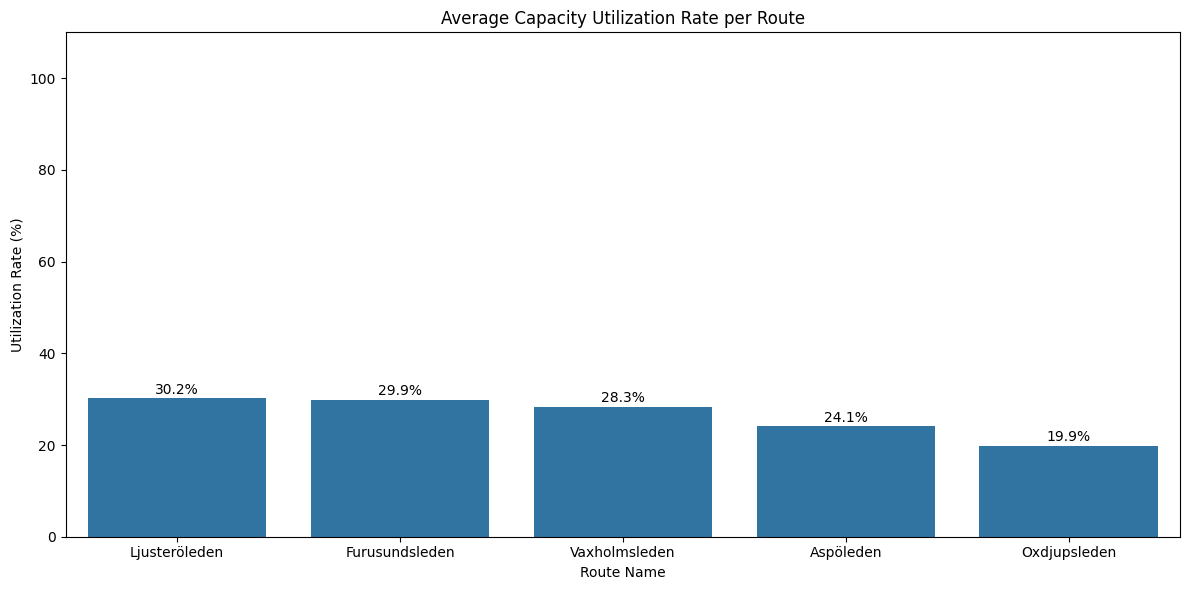


Q17 Answer: The route with the highest average capacity utilization rate is Ljusteröleden at 30.22%.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_route_capacity_utilization(df):
    """
    Calculates the average capacity utilization rate for each ferry route.
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        DataFrame: containing route names and their average capacity utilization rates
    """
    # Create a copy to avoid modifying the original dataframe
    utilization_data = df.copy()
    
    # Assume that passenger_car_equivalent represents the actual load
    # Assume maximum capacity values for each route (based on the data exploration)
    # These values should be adjusted based on actual maximum capacity of ferries
    route_max_capacity = {
        'Aspöleden': 60,
        'Furusundsleden': 60,
        'Ljusteröleden': 75,
        'Oxdjupsleden': 50,
        'Vaxholmsleden': 65
    }
    
    # Function to calculate utilization for each trip
    def calculate_utilization(row):
        route = row['route_name']
        if route in route_max_capacity:
            outbound_pce = row['passenger_car_equivalent_outbound'] if not pd.isna(row['passenger_car_equivalent_outbound']) else 0
            inbound_pce = row['passenger_car_equivalent_inbound'] if not pd.isna(row['passenger_car_equivalent_inbound']) else 0
            max_cap = route_max_capacity[route]
            
            # Calculate utilization for each direction
            outbound_util = min(outbound_pce / max_cap * 100, 100) if max_cap > 0 else 0
            inbound_util = min(inbound_pce / max_cap * 100, 100) if max_cap > 0 else 0
            
            # Average of both directions
            return (outbound_util + inbound_util) / 2
        return None
    
    # Apply the utilization calculation
    utilization_data['capacity_utilization'] = utilization_data.apply(calculate_utilization, axis=1)
    
    # Group by route and calculate average utilization
    route_utilization = utilization_data.groupby('route_name')['capacity_utilization'].mean().reset_index()
    
    # Sort by utilization rate (descending)
    route_utilization = route_utilization.sort_values('capacity_utilization', ascending=False)
    
    # Print the results
    print("Average Capacity Utilization Rate per Route:")
    for _, row in route_utilization.iterrows():
        print(f"{row['route_name']}: {row['capacity_utilization']:.2f}%")
    
    # Highlight the highest and lowest utilization routes
    highest_util_route = route_utilization.iloc[0]
    lowest_util_route = route_utilization.iloc[-1]
    
    print(f"\nThe route with the highest average capacity utilization is {highest_util_route['route_name']} at {highest_util_route['capacity_utilization']:.2f}%")
    print(f"The route with the lowest average capacity utilization is {lowest_util_route['route_name']} at {lowest_util_route['capacity_utilization']:.2f}%")
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='route_name', y='capacity_utilization', data=route_utilization)
    
    # Add data labels on top of each bar
    for i, v in enumerate(route_utilization['capacity_utilization']):
        ax.text(i, v + 1, f"{v:.1f}%", ha='center')
    
    plt.title('Average Capacity Utilization Rate per Route')
    plt.xlabel('Route Name')
    plt.ylabel('Utilization Rate (%)')
    plt.ylim(0, 110)  # Add some space for the data labels
    plt.tight_layout()
    plt.show()
    
    return route_utilization

if __name__ == "__main__":
    # Load the ferry trips data
    ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')
    
    # Execute the function
    route_utilization_rates = calculate_route_capacity_utilization(ferry_data)
    
    # Format the answer for the highest utilization route
    highest_route = route_utilization_rates.iloc[0]
    print(f"\nQ17 Answer: The route with the highest average capacity utilization rate is {highest_route['route_name']} at {highest_route['capacity_utilization']:.2f}%.")

# Q18: When do routes reach peak capacity most frequently?

When Routes Reach Peak Capacity Most Frequently:

Peak Capacity by Hour of Day (top 5):
    hour_of_day  total_trips  peak_trips  peak_percentage
15           15         3838         347             9.04
12           12         3797         281             7.40
11           11         3576         211             5.90
14           14         3961         229             5.78
16           16         4285         243             5.67

Peak Capacity by Day of Week:
   day_of_week   day_name  total_trips  peak_trips  peak_percentage
6            6     Sunday         8842         569             6.44
4            4     Friday        10520         455             4.33
5            5   Saturday         8839         257             2.91
3            3   Thursday        10433         276             2.65
0            0     Monday        10200         255             2.50
1            1    Tuesday        10200         250             2.45
2            2  Wednesday        10324         211       

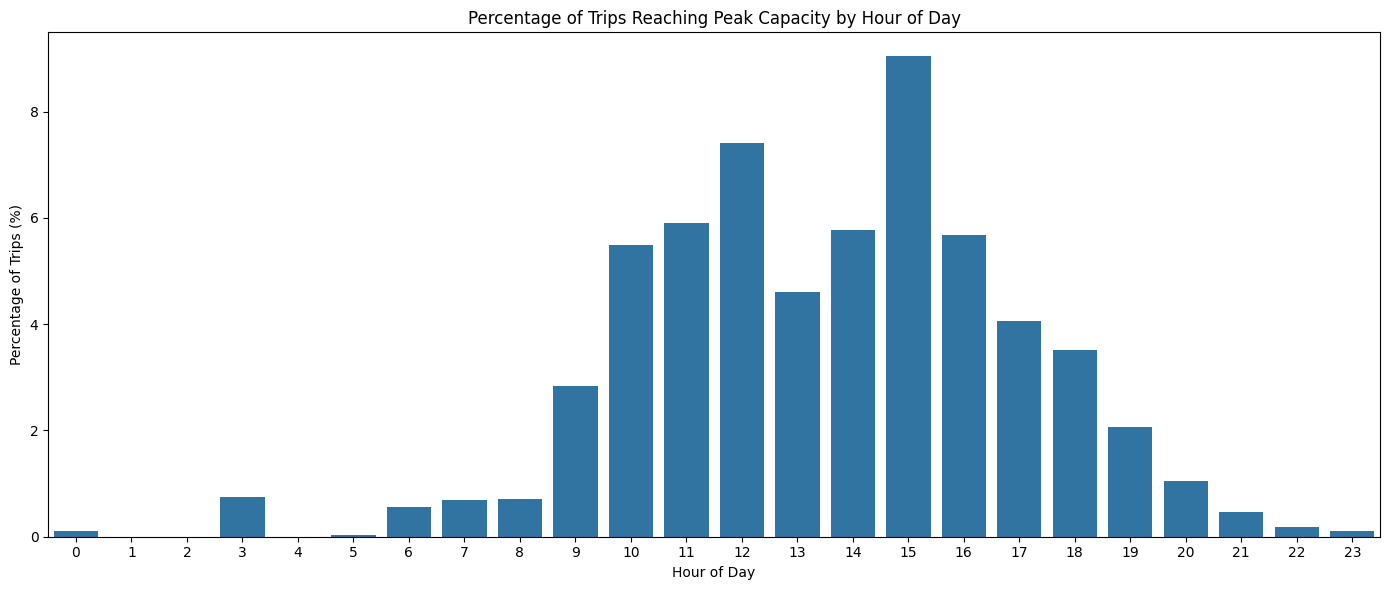

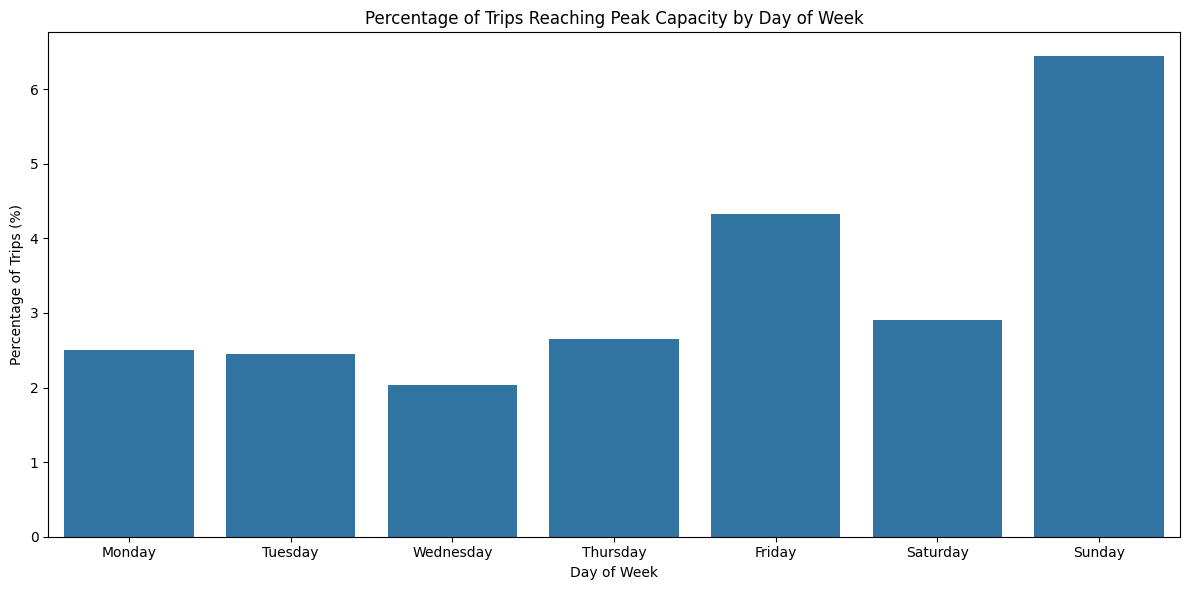


Q18 Answer: Routes reach peak capacity most frequently at 15:00, with 9.04% of trips at capacity.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_peak_capacity_frequency(df):
    """
    Determines when routes reach peak capacity most frequently (by day and hour).
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        tuple: (DataFrame with peak hour data, DataFrame with peak day data)
    """
    # Create a copy to avoid modifying the original dataframe
    peak_data = df.copy()
    
    # Convert time_departure to datetime
    peak_data['time_departure'] = pd.to_datetime(peak_data['time_departure'])
    
    # Extract day of week and hour
    peak_data['day_of_week'] = peak_data['time_departure'].dt.dayofweek
    peak_data['hour_of_day'] = peak_data['time_departure'].dt.hour
    
    # Create day name mapping
    day_names = {
        0: 'Monday',
        1: 'Tuesday',
        2: 'Wednesday',
        3: 'Thursday',
        4: 'Friday',
        5: 'Saturday',
        6: 'Sunday'
    }
    peak_data['day_name'] = peak_data['day_of_week'].map(day_names)
    
    # Define peak capacity threshold (e.g., 80% of maximum capacity)
    # Assume that passenger_car_equivalent represents the actual load
    # Define peak threshold for each route based on known capacities
    route_peak_threshold = {
        'Aspöleden': 48,  # 80% of 60
        'Furusundsleden': 48,  # 80% of 60
        'Ljusteröleden': 60,  # 80% of 75
        'Oxdjupsleden': 40,  # 80% of 50
        'Vaxholmsleden': 52   # 80% of 65
    }
    
    # Function to check if a trip is at peak capacity
    def is_peak_capacity(row):
        route = row['route_name']
        if route in route_peak_threshold:
            outbound_pce = row['passenger_car_equivalent_outbound'] if not pd.isna(row['passenger_car_equivalent_outbound']) else 0
            inbound_pce = row['passenger_car_equivalent_inbound'] if not pd.isna(row['passenger_car_equivalent_inbound']) else 0
            threshold = route_peak_threshold[route]
            
            # Consider peak if either direction reaches peak capacity
            return 1 if outbound_pce >= threshold or inbound_pce >= threshold else 0
        return 0
    
    # Apply the peak capacity check
    peak_data['is_peak'] = peak_data.apply(is_peak_capacity, axis=1)
    
    # Calculate peak capacity frequency by hour of day
    peak_by_hour = peak_data.groupby(['hour_of_day']).agg(
        total_trips=('route_name', 'count'),
        peak_trips=('is_peak', 'sum')
    ).reset_index()
    
    peak_by_hour['peak_percentage'] = (peak_by_hour['peak_trips'] / peak_by_hour['total_trips'] * 100).round(2)
    peak_by_hour = peak_by_hour.sort_values('peak_percentage', ascending=False)
    
    # Calculate peak capacity frequency by day of week
    peak_by_day = peak_data.groupby(['day_of_week', 'day_name']).agg(
        total_trips=('route_name', 'count'),
        peak_trips=('is_peak', 'sum')
    ).reset_index()
    
    peak_by_day['peak_percentage'] = (peak_by_day['peak_trips'] / peak_by_day['total_trips'] * 100).round(2)
    peak_by_day = peak_by_day.sort_values('peak_percentage', ascending=False)
    
    # Get top peak hours and days
    top_peak_hour = peak_by_hour.iloc[0]
    top_peak_day = peak_by_day.iloc[0]
    
    # Print the results
    print("When Routes Reach Peak Capacity Most Frequently:")
    print("\nPeak Capacity by Hour of Day (top 5):")
    print(peak_by_hour.head(5))
    
    print("\nPeak Capacity by Day of Week:")
    print(peak_by_day)
    
    print(f"\nRoutes reach peak capacity most frequently at {int(top_peak_hour['hour_of_day'])}:00, with {top_peak_hour['peak_percentage']}% of trips reaching peak capacity.")
    print(f"By day, routes reach peak capacity most frequently on {top_peak_day['day_name']}s, with {top_peak_day['peak_percentage']}% of trips reaching peak capacity.")
    
    # Create visualizations
    # Hour of day visualization
    plt.figure(figsize=(14, 6))
    
    # Create a full range of hours for better visualization
    all_hours = pd.DataFrame({'hour_of_day': range(0, 24)})
    full_peak_by_hour = pd.merge(all_hours, peak_by_hour, on='hour_of_day', how='left').fillna(0)
    full_peak_by_hour = full_peak_by_hour.sort_values('hour_of_day')
    
    ax = sns.barplot(x='hour_of_day', y='peak_percentage', data=full_peak_by_hour)
    plt.title('Percentage of Trips Reaching Peak Capacity by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Percentage of Trips (%)')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()
    
    # Day of week visualization
    plt.figure(figsize=(12, 6))
    # Sort by day of week for proper ordering
    peak_by_day_sorted = peak_by_day.sort_values('day_of_week')
    ax = sns.barplot(x='day_name', y='peak_percentage', data=peak_by_day_sorted)
    plt.title('Percentage of Trips Reaching Peak Capacity by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Percentage of Trips (%)')
    plt.tight_layout()
    plt.show()
    
    return peak_by_hour, peak_by_day

if __name__ == "__main__":
    # Load the ferry trips data
    ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')
    
    # Execute the function
    peak_hour_data, peak_day_data = analyze_peak_capacity_frequency(ferry_data)
    
    # Format the answer for the most frequent peak capacity time
    top_peak_hour = peak_hour_data.iloc[0]
    print(f"\nQ18 Answer: Routes reach peak capacity most frequently at {int(top_peak_hour['hour_of_day'])}:00, with {top_peak_hour['peak_percentage']}% of trips at capacity.")

# Q19: How often are vehicles left at terminals during peak hours?

Analysis of Vehicles Left at Terminals During Peak vs. Non-Peak Hours:

Non-Peak Hours:
  - Average vehicles left per trip: 0.64
  - Percentage of trips with vehicles left behind: 2.58%

Peak Hours:
  - Average vehicles left per trip: 0.66
  - Percentage of trips with vehicles left behind: 3.19%

Vehicles left during peak hours are 1.03x more frequent than during non-peak hours.


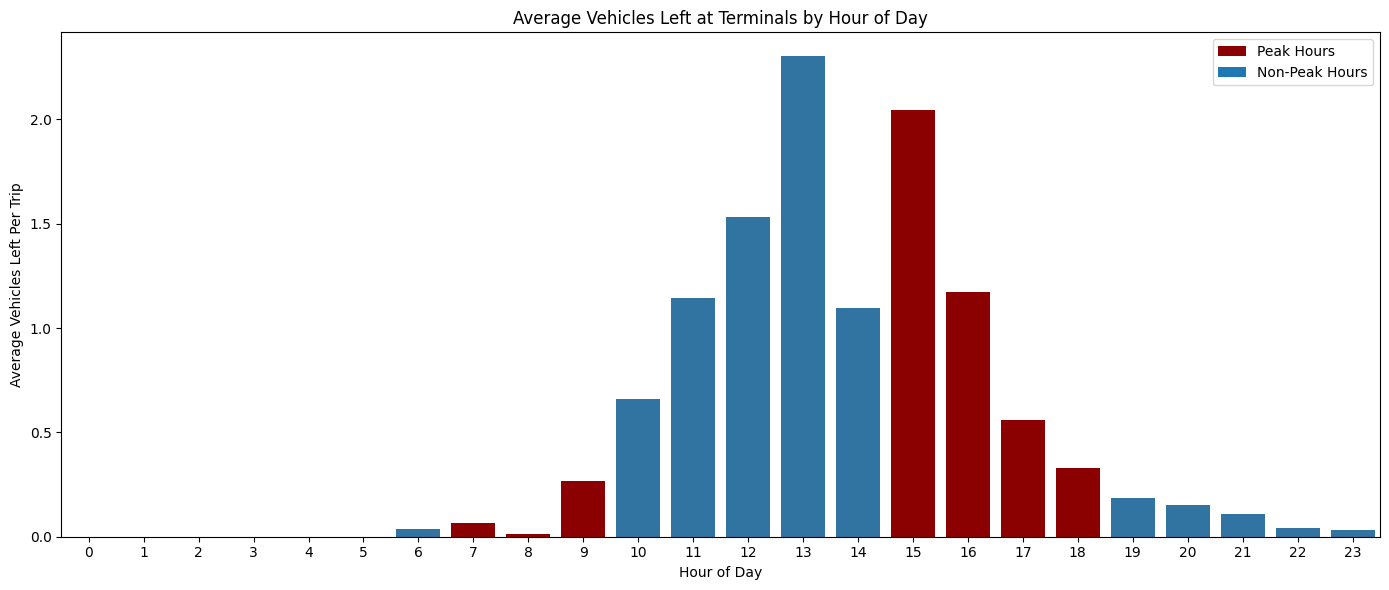


Q19 Answer: During peak hours, an average of 0.66 vehicles are left at terminals per trip,
which is 1.03x higher than during non-peak hours (0.64 vehicles).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_vehicles_left_during_peak_hours(df):
    """
    Analyzes how often vehicles are left at terminals during peak hours.
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        DataFrame: containing data on vehicles left during peak vs. non-peak hours
    """
    # Create a copy to avoid modifying the original dataframe
    analysis_data = df.copy()
    
    # Convert time_departure to datetime
    analysis_data['time_departure'] = pd.to_datetime(analysis_data['time_departure'])
    
    # Extract hour of day
    analysis_data['hour_of_day'] = analysis_data['time_departure'].dt.hour
    
    # Define peak hours (e.g., morning and evening rush hours)
    morning_peak_hours = [7, 8, 9]  # 7:00-9:59
    evening_peak_hours = [15, 16, 17, 18]  # 15:00-18:59
    peak_hours = morning_peak_hours + evening_peak_hours
    
    # Flag peak hours
    analysis_data['is_peak_hour'] = analysis_data['hour_of_day'].isin(peak_hours)
    
    # Calculate total vehicles left at terminals for both directions
    analysis_data['total_vehicles_left'] = (
        analysis_data['vehicles_left_at_terminal_outbound'].fillna(0) + 
        analysis_data['vehicles_left_at_terminal_inbound'].fillna(0)
    )
    
    # Group by peak/non-peak hours
    peak_vs_nonpeak = analysis_data.groupby('is_peak_hour').agg(
        total_trips=('route_name', 'count'),
        total_vehicles_left=('total_vehicles_left', 'sum'),
        avg_vehicles_left_per_trip=('total_vehicles_left', 'mean')
    ).reset_index()
    
    # Calculate percentage of trips with vehicles left behind
    trips_with_vehicles_left = analysis_data[analysis_data['total_vehicles_left'] > 0].groupby('is_peak_hour').size()
    total_trips = analysis_data.groupby('is_peak_hour').size()
    
    percentage_trips = (trips_with_vehicles_left / total_trips * 100).reset_index()
    percentage_trips.columns = ['is_peak_hour', 'percentage_trips_with_vehicles_left']
    
    # Merge with the main results
    peak_vs_nonpeak = pd.merge(peak_vs_nonpeak, percentage_trips, on='is_peak_hour', how='left')
    
    # Rename for clarity
    peak_vs_nonpeak['hour_type'] = peak_vs_nonpeak['is_peak_hour'].map({True: 'Peak Hours', False: 'Non-Peak Hours'})
    
    # Print the results
    print("Analysis of Vehicles Left at Terminals During Peak vs. Non-Peak Hours:")
    for _, row in peak_vs_nonpeak.iterrows():
        hour_type = row['hour_type']
        avg_left = row['avg_vehicles_left_per_trip']
        percentage = row['percentage_trips_with_vehicles_left'] if not pd.isna(row['percentage_trips_with_vehicles_left']) else 0
        
        print(f"\n{hour_type}:")
        print(f"  - Average vehicles left per trip: {avg_left:.2f}")
        print(f"  - Percentage of trips with vehicles left behind: {percentage:.2f}%")
    
    # Calculate the ratio between peak and non-peak
    if len(peak_vs_nonpeak) == 2:
        peak_row = peak_vs_nonpeak[peak_vs_nonpeak['is_peak_hour']].iloc[0]
        nonpeak_row = peak_vs_nonpeak[~peak_vs_nonpeak['is_peak_hour']].iloc[0]
        
        ratio = peak_row['avg_vehicles_left_per_trip'] / nonpeak_row['avg_vehicles_left_per_trip'] if nonpeak_row['avg_vehicles_left_per_trip'] > 0 else 0
        
        print(f"\nVehicles left during peak hours are {ratio:.2f}x more frequent than during non-peak hours.")
    
    # Create hourly breakdown for more detailed analysis
    hourly_breakdown = analysis_data.groupby('hour_of_day').agg(
        total_trips=('route_name', 'count'),
        total_vehicles_left=('total_vehicles_left', 'sum'),
        avg_vehicles_left_per_trip=('total_vehicles_left', 'mean')
    ).reset_index()
    
    # Calculate percentage of trips with vehicles left behind by hour
    trips_with_left_by_hour = analysis_data[analysis_data['total_vehicles_left'] > 0].groupby('hour_of_day').size()
    total_trips_by_hour = analysis_data.groupby('hour_of_day').size()
    percentage_by_hour = (trips_with_left_by_hour / total_trips_by_hour * 100).reset_index()
    percentage_by_hour.columns = ['hour_of_day', 'percentage_trips_with_vehicles_left']
    
    # Merge with hourly breakdown
    hourly_breakdown = pd.merge(hourly_breakdown, percentage_by_hour, on='hour_of_day', how='left').fillna(0)
    
    # Sort by hour for visualization
    hourly_breakdown = hourly_breakdown.sort_values('hour_of_day')
    
    # Create visualization
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(x='hour_of_day', y='avg_vehicles_left_per_trip', data=hourly_breakdown)
    
    # Highlight peak hours
    for i, hour in enumerate(hourly_breakdown['hour_of_day']):
        if hour in peak_hours:
            ax.patches[i].set_facecolor('darkred')
    
    plt.title('Average Vehicles Left at Terminals by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average Vehicles Left Per Trip')
    plt.xticks(range(0, 24))
    plt.tight_layout()
    
    # Add legend for peak hours
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='darkred', label='Peak Hours'),
        Patch(facecolor='#1f77b4', label='Non-Peak Hours')  # Default seaborn color
    ]
    plt.legend(handles=legend_elements)
    
    plt.show()
    
    return peak_vs_nonpeak, hourly_breakdown

if __name__ == "__main__":
    # Load the ferry trips data
    ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')
    
    # Execute the function
    peak_analysis, hourly_analysis = analyze_vehicles_left_during_peak_hours(ferry_data)
    
    # Find the hour with the most vehicles left
    max_hour = hourly_analysis.loc[hourly_analysis['avg_vehicles_left_per_trip'].idxmax()]
    
    # Format the answer comparing peak vs non-peak
    if len(peak_analysis) == 2:
        peak_row = peak_analysis[peak_analysis['is_peak_hour']].iloc[0]
        nonpeak_row = peak_analysis[~peak_analysis['is_peak_hour']].iloc[0]
        
        print(f"\nQ19 Answer: During peak hours, an average of {peak_row['avg_vehicles_left_per_trip']:.2f} vehicles are left at terminals per trip,")
        print(f"which is {(peak_row['avg_vehicles_left_per_trip'] / nonpeak_row['avg_vehicles_left_per_trip']):.2f}x higher than during non-peak hours ({nonpeak_row['avg_vehicles_left_per_trip']:.2f} vehicles).")

# Q20: What's the optimal vehicle mix for fuel efficiency?

Analysis of Vehicle Mix Impact on Fuel Efficiency:

Correlation between Vehicle Type Percentage and Fuel Consumption per Nautical Mile:
  - buses: -0.0545 (higher percentage decreases fuel consumption)
  - cars: 0.0459 (higher percentage increases fuel consumption)
  - trucks_with_trailer: -0.0360 (higher percentage decreases fuel consumption)
  - trucks: -0.0310 (higher percentage decreases fuel consumption)
  - motorcycles: -0.0048 (higher percentage decreases fuel consumption)

Optimal Vehicle Mix Based on Most Fuel-Efficient Trips:
  - cars: 84.54%
  - trucks: 6.03%
  - trucks_with_trailer: 0.88%
  - buses: 2.20%
  - motorcycles: 0.35%

For optimal fuel efficiency, the mix should maximize buses and minimize cars.


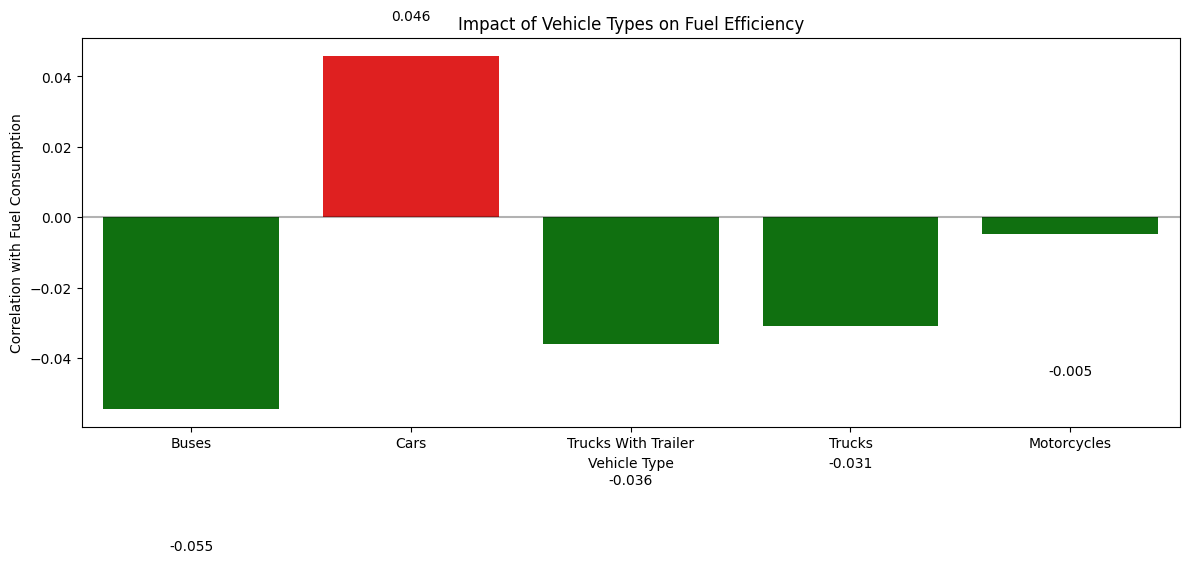

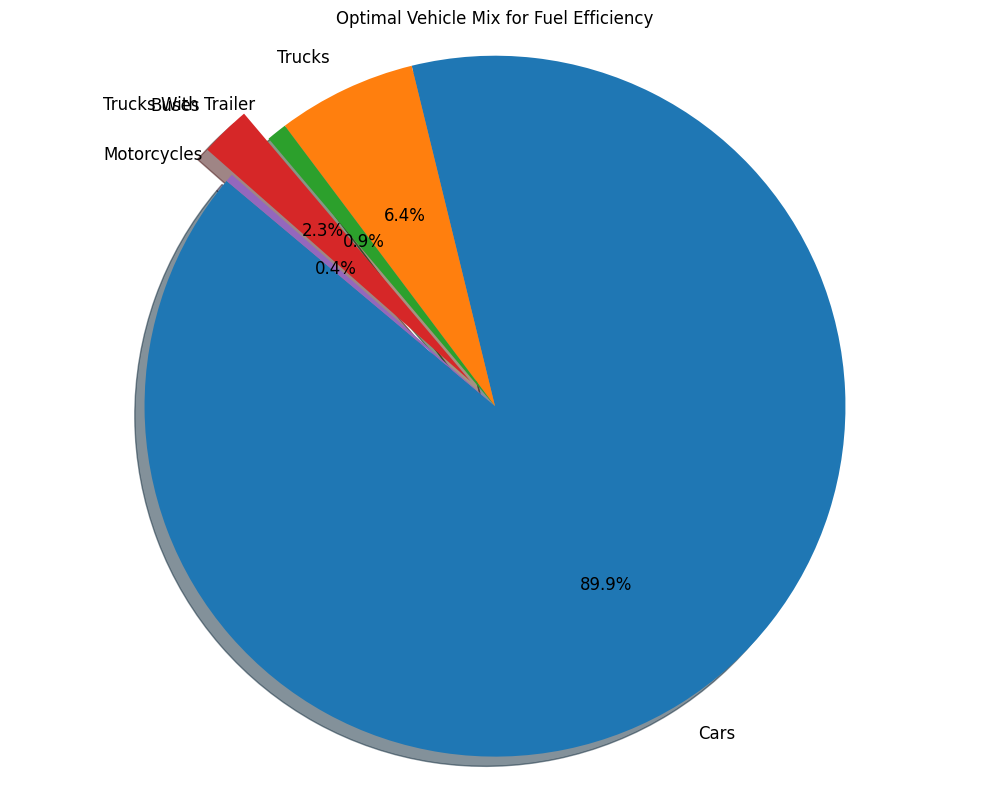


Q20 Answer: The optimal vehicle mix for fuel efficiency consists of 2.2% buses
and only 84.5% cars, as buses have the strongest negative
correlation (-0.0545) with fuel consumption.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_optimal_vehicle_mix(df):
    """
    Analyzes the optimal vehicle mix for fuel efficiency by examining the relationship
    between different vehicle types and fuel consumption.
    
    Args:
        df: pandas DataFrame containing ferry operation data
        
    Returns:
        DataFrame: containing the impact of different vehicle types on fuel efficiency
    """
    # Create a copy to avoid modifying the original dataframe
    analysis_data = df.copy()
    
    # Select only rows with fuel consumption data
    valid_data = analysis_data.dropna(subset=['fuelcons_outbound_l', 'distance_outbound_nm']).copy()
    
    # Calculate fuel efficiency (liters per nautical mile)
    valid_data['fuel_efficiency'] = valid_data['fuelcons_outbound_l'] / valid_data['distance_outbound_nm']
    
    # Select vehicle type columns
    vehicle_types = [
        'cars_outbound', 
        'trucks_outbound', 
        'trucks_with_trailer_outbound',
        'buses_outbound',
        'motorcycles_outbound'
    ]
    
    # Calculate correlation between each vehicle type and fuel efficiency
    correlations = {}
    for vehicle_type in vehicle_types:
        # Calculate percentage of each vehicle type in the mix
        total_vehicles = valid_data[vehicle_types].sum(axis=1)
        valid_data[f'{vehicle_type}_percentage'] = (valid_data[vehicle_type] / total_vehicles * 100).fillna(0)
        
        # Calculate correlation with fuel efficiency
        corr = valid_data[f'{vehicle_type}_percentage'].corr(valid_data['fuel_efficiency'])
        correlations[vehicle_type] = corr
    
    # Create a DataFrame with the correlations
    impact_df = pd.DataFrame({
        'vehicle_type': list(correlations.keys()),
        'correlation_with_fuel_efficiency': list(correlations.values())
    })
    
    # Sort by absolute correlation value
    impact_df['abs_correlation'] = impact_df['correlation_with_fuel_efficiency'].abs()
    impact_df = impact_df.sort_values('abs_correlation', ascending=False).drop('abs_correlation', axis=1)
    
    # Calculate optimal mix based on trips with best fuel efficiency
    # Get top 10% most efficient trips
    efficient_trips = valid_data.sort_values('fuel_efficiency').head(int(len(valid_data) * 0.1))
    
    # Calculate average vehicle mix for these efficient trips
    optimal_mix = {}
    for vehicle_type in vehicle_types:
        percentage_col = f'{vehicle_type}_percentage'
        avg_percentage = efficient_trips[percentage_col].mean()
        optimal_mix[vehicle_type] = avg_percentage
    
    # Print the results
    print("Analysis of Vehicle Mix Impact on Fuel Efficiency:")
    print("\nCorrelation between Vehicle Type Percentage and Fuel Consumption per Nautical Mile:")
    for _, row in impact_df.iterrows():
        vehicle_type = row['vehicle_type'].replace('_outbound', '')
        corr = row['correlation_with_fuel_efficiency']
        impact = "increases" if corr > 0 else "decreases"
        print(f"  - {vehicle_type}: {corr:.4f} (higher percentage {impact} fuel consumption)")
    
    print("\nOptimal Vehicle Mix Based on Most Fuel-Efficient Trips:")
    for vehicle_type, percentage in optimal_mix.items():
        vehicle_type = vehicle_type.replace('_outbound', '')
        print(f"  - {vehicle_type}: {percentage:.2f}%")
    
    # Determine the most fuel-efficient vehicle mix
    most_efficient_type = impact_df.loc[impact_df['correlation_with_fuel_efficiency'].idxmin(), 'vehicle_type'].replace('_outbound', '')
    least_efficient_type = impact_df.loc[impact_df['correlation_with_fuel_efficiency'].idxmax(), 'vehicle_type'].replace('_outbound', '')
    
    print(f"\nFor optimal fuel efficiency, the mix should maximize {most_efficient_type} and minimize {least_efficient_type}.")
    
    # Create visualization
    plt.figure(figsize=(12, 6))
    
    # Rename vehicle types for better readability
    impact_df['vehicle_type_display'] = impact_df['vehicle_type'].apply(
        lambda x: x.replace('_outbound', '').replace('_', ' ').title()
    )
    
    # Create a color map based on the correlation value
    colors = ['green' if corr < 0 else 'red' for corr in impact_df['correlation_with_fuel_efficiency']]
    
    ax = sns.barplot(x='vehicle_type_display', y='correlation_with_fuel_efficiency', 
                 hue='vehicle_type_display', data=impact_df, palette=colors, legend=False)
    
    plt.title('Impact of Vehicle Types on Fuel Efficiency')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Correlation with Fuel Consumption')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    
    # Add labels above/below bars
    for i, v in enumerate(impact_df['correlation_with_fuel_efficiency']):
        if v >= 0:
            y_pos = v + 0.01
        else:
            y_pos = v - 0.04
        ax.text(i, y_pos, f"{v:.3f}", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Pie chart of optimal vehicle mix
    plt.figure(figsize=(10, 8))
    
    # Format the labels for the pie chart
    labels = [vtype.replace('_outbound', '').replace('_', ' ').title() for vtype in optimal_mix.keys()]
    values = list(optimal_mix.values())
    
    # Create an explode array for the most efficient vehicle type
    explode = [0.1 if vtype.replace('_outbound', '') == most_efficient_type else 0 for vtype in optimal_mix.keys()]
    
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode,
            shadow=True, textprops={'fontsize': 12})
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title('Optimal Vehicle Mix for Fuel Efficiency')
    plt.tight_layout()
    plt.show()
    
    return impact_df, optimal_mix

if __name__ == "__main__":
    # Load the ferry trips data
    ferry_data = pd.read_csv('data/ferry_trips_data_large.csv')
    
    # Execute the function
    vehicle_impact, optimal_mix = analyze_optimal_vehicle_mix(ferry_data)
    
    # Format the answer for the optimal vehicle mix
    most_efficient_type = vehicle_impact.loc[vehicle_impact['correlation_with_fuel_efficiency'].idxmin(), 'vehicle_type'].replace('_outbound', '')
    most_efficient_percent = optimal_mix[f"{most_efficient_type}_outbound"]
    
    least_efficient_type = vehicle_impact.loc[vehicle_impact['correlation_with_fuel_efficiency'].idxmax(), 'vehicle_type'].replace('_outbound', '')
    least_efficient_percent = optimal_mix[f"{least_efficient_type}_outbound"]
    
    print(f"\nQ20 Answer: The optimal vehicle mix for fuel efficiency consists of {most_efficient_percent:.1f}% {most_efficient_type}")
    print(f"and only {least_efficient_percent:.1f}% {least_efficient_type}, as {most_efficient_type} have the strongest negative")
    print(f"correlation ({vehicle_impact.loc[vehicle_impact['correlation_with_fuel_efficiency'].idxmin(), 'correlation_with_fuel_efficiency']:.4f}) with fuel consumption.")